c:\Users\mahab\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Shape of the dataset: (1338, 7)

Features (X) for clustering (after dropping 'charges'):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Missing values before imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Categorical columns to be one-hot encoded: ['sex', 'smoker', 'region']

--- Data Sample

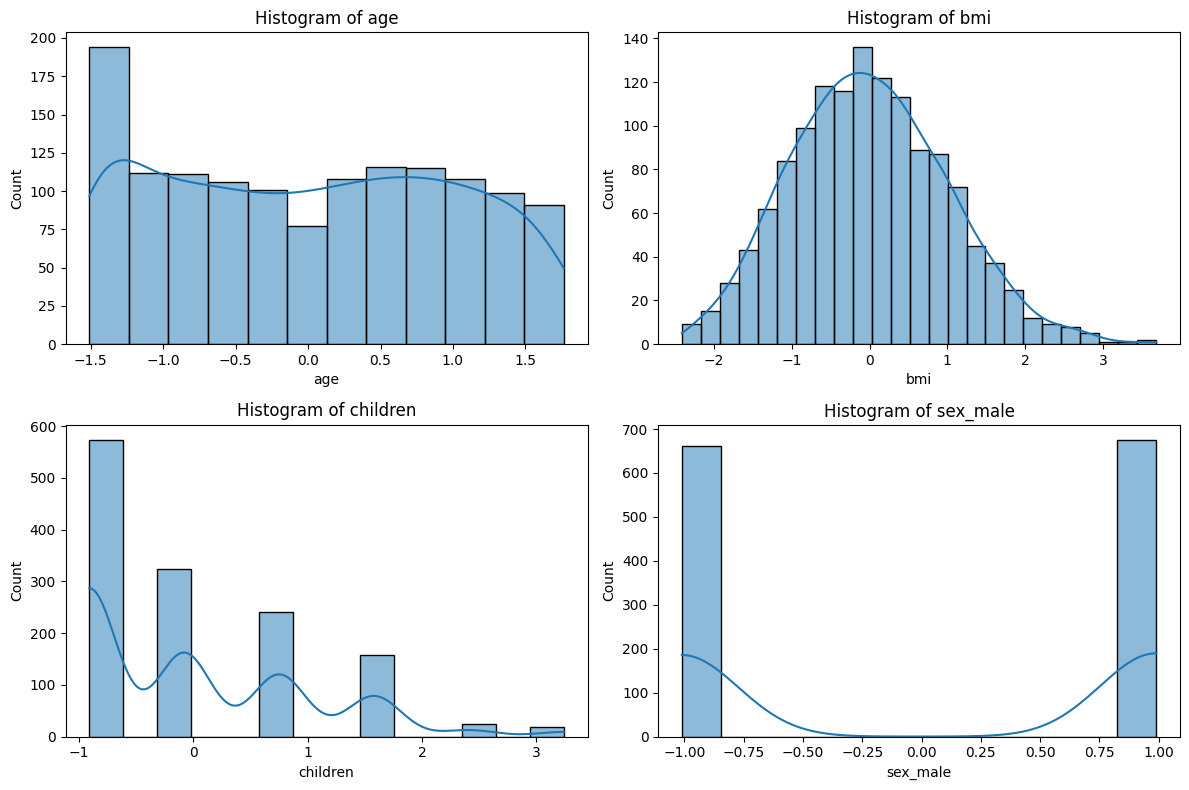


--- K-Means Clustering ---


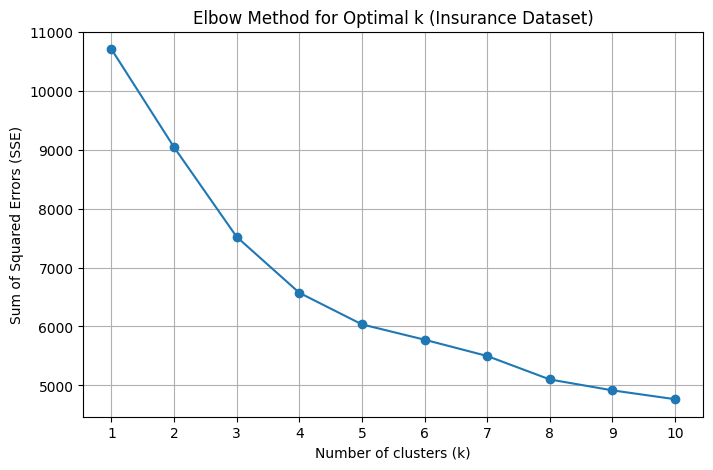

Elbow Method: Look for an 'elbow' point where SSE starts to decrease less rapidly.
Based on the plot, choose a suitable k for your data.
For n_clusters = 2, the average silhouette_score is : 0.1729
For n_clusters = 3, the average silhouette_score is : 0.2320
For n_clusters = 4, the average silhouette_score is : 0.2224
For n_clusters = 5, the average silhouette_score is : 0.2184
For n_clusters = 6, the average silhouette_score is : 0.1779
For n_clusters = 7, the average silhouette_score is : 0.1884
For n_clusters = 8, the average silhouette_score is : 0.2198
For n_clusters = 9, the average silhouette_score is : 0.2109
For n_clusters = 10, the average silhouette_score is : 0.2051


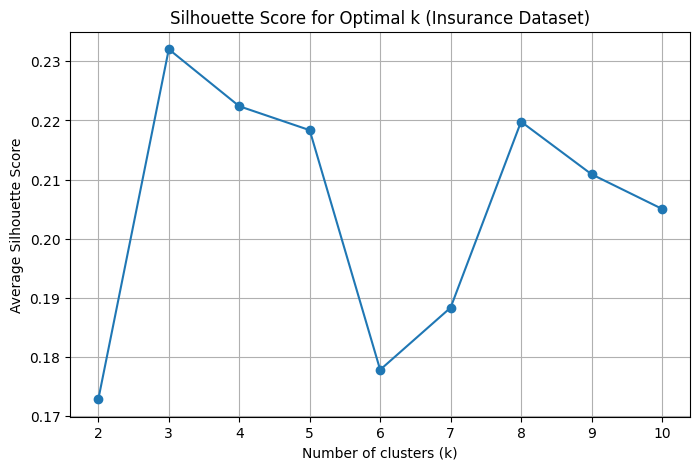

Silhouette Score: Look for the peak score. Choose k that maximizes this score.

Applying K-Means with k=4 (ADJUST THIS BASED ON PLOTS)...
K-Means cluster counts:
0    324
1    325
2    325
3    364
Name: count, dtype: int64

--- DBSCAN Clustering ---
Number of features for DBSCAN: 8
Suggested min_samples for DBSCAN (2*dim): 16. Adjust as needed.
Calculating k-distances for DBSCAN (k=16)...


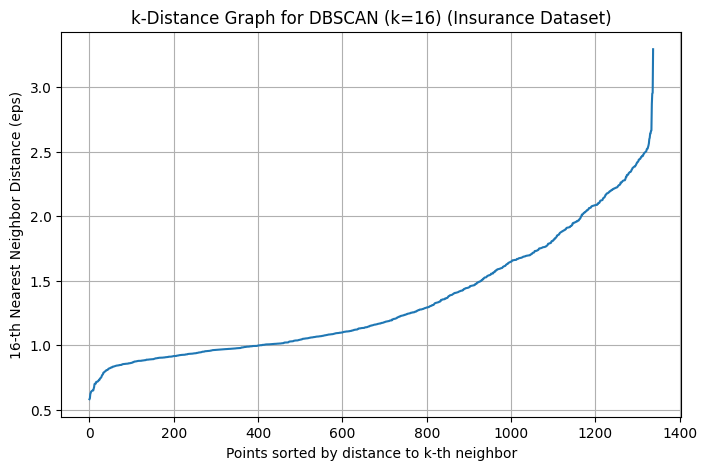

k-Distance Graph: Look for an 'elbow' in this plot to choose eps. This indicates a region where density changes.
Based on this plot, choose a suitable eps for your data.

Applying DBSCAN with eps=1.5 and min_samples=16 (ADJUST THESE BASED ON PLOTS/EXPERIMENTATION)...
DBSCAN cluster counts (label -1 means noise):
-1     187
 0     128
 1     132
 2     136
 3     134
 4     121
 5     121
 6     131
 7     138
 8      50
 9      28
 10     16
 11     16
Name: count, dtype: int64
Estimated number of clusters by DBSCAN: 12
Estimated number of noise points by DBSCAN: 187

--- Dimensionality Reduction ---
Applying PCA...
Explained variance ratio by PCA components: [0.19216849 0.16586792]
Total explained variance by 2 PCA components: 0.3580

Applying t-SNE...


c:\Users\mahab\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Applying UMAP...


c:\Users\mahab\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\mahab\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



--- Visualizing Clusters in 2D (Insurance Dataset) ---

Visualizing K-Means Clusters:


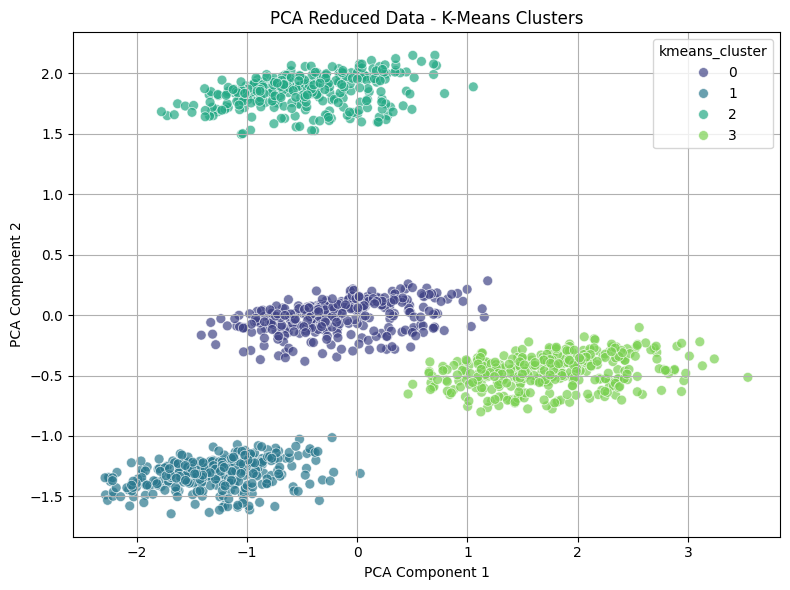

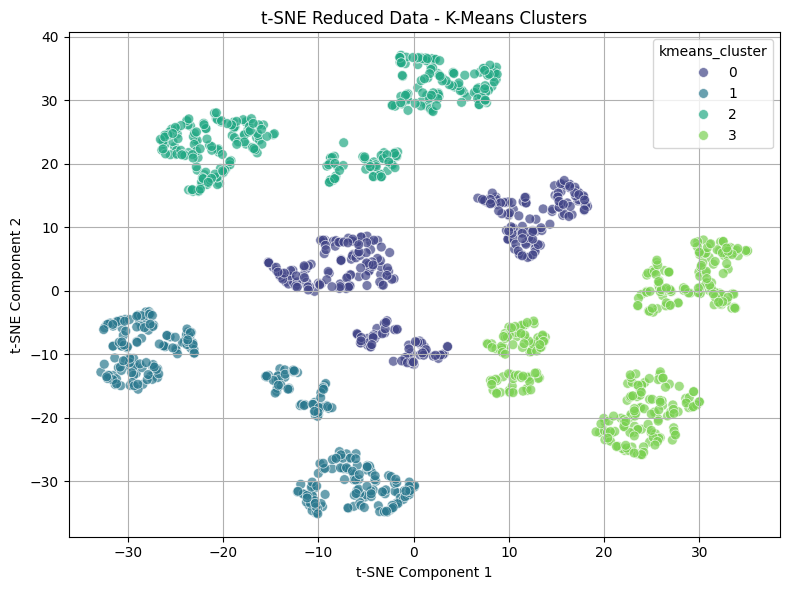

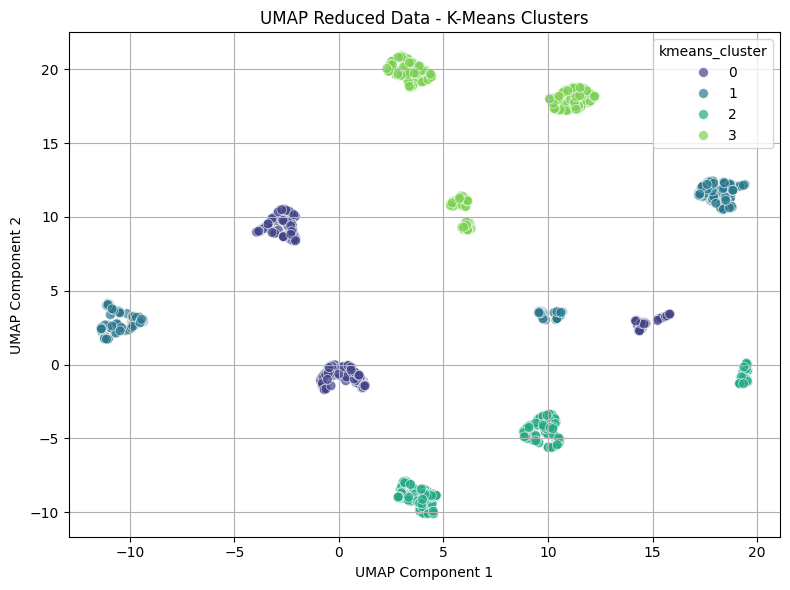


Visualizing DBSCAN Clusters:


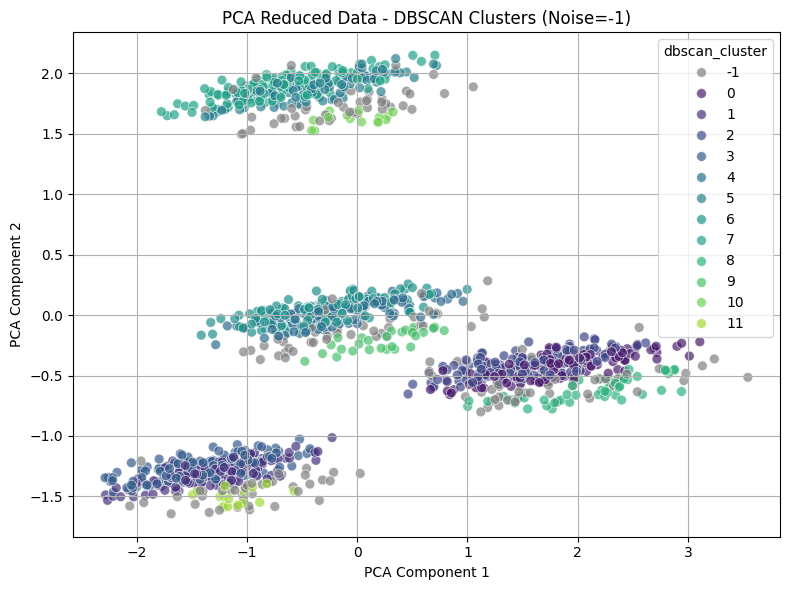

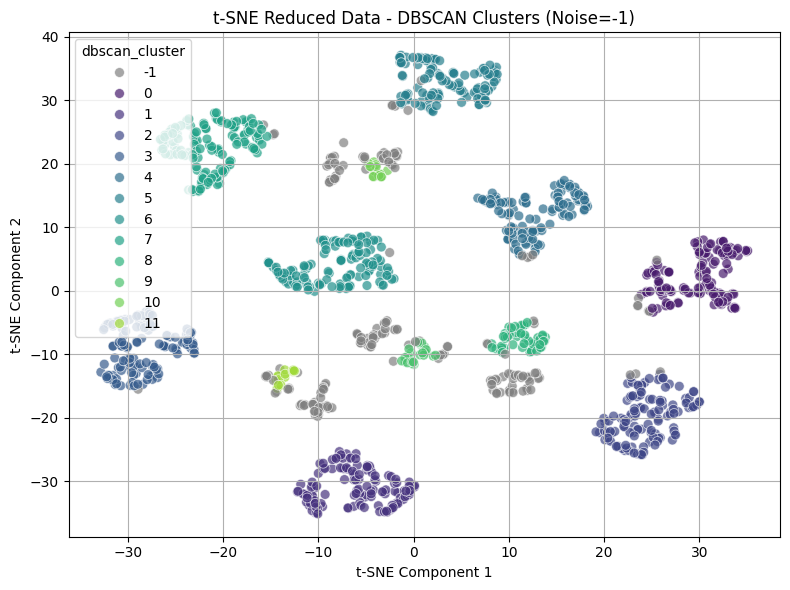

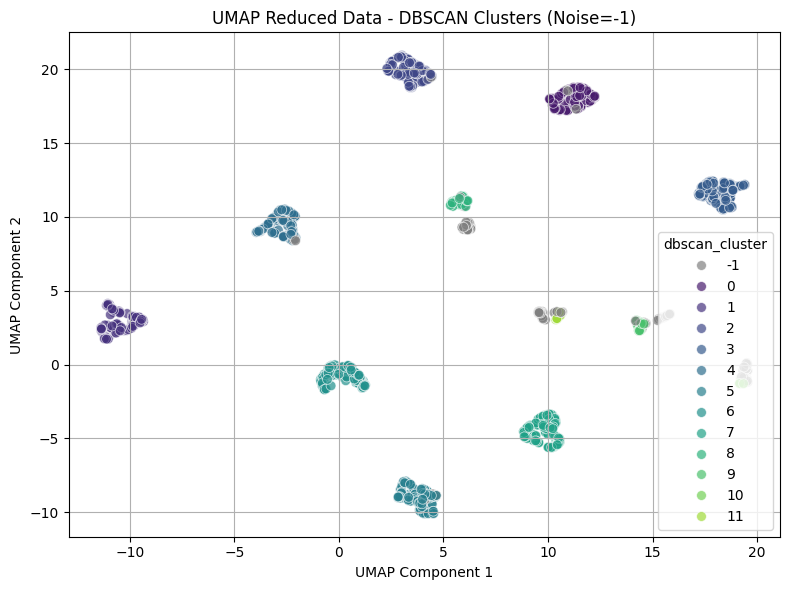


--- Comparison of Dimensionality Reduction Methods (Insurance Dataset) ---

PCA:
- Aims to preserve global structure by maximizing variance.
- Linear transformation. Clusters that are linearly separable in high dimensions might remain so in 2D.
- Fast to compute. May show overlapping clusters if they are not well separated by linear projections.

t-SNE:
- Aims to preserve local structure, keeping similar points close.
- Non-linear and stochastic. Often creates visually distinct clusters, but global structure (e.g., relative distances/sizes of clusters) might be misleading.
- Computationally more intensive. Perplexity is an important parameter.

UMAP:
- Aims to preserve both local and global structure, often providing a good balance.
- Non-linear and generally faster than t-SNE for larger datasets.
- Often produces high-quality embeddings. Sensitive to `n_neighbors` and `min_dist`.

Observations for the Insurance Dataset (Students should make their own based on their plots):
- How well

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [ ]:
# This code was enhanced by Gemini (2025)

df = pd.read_csv('insurance.csv')

print(df.head())
print(f"\nShape of the dataset: {df.shape}")

# Recommended by Gemini (2025)
if 'charges' in df.columns:
    X = df.drop('charges', axis=1)
else:
    X = df.copy()

print(f"\nFeatures (X) for clustering (after dropping 'charges'):")
print(X.head())

print(f"\nMissing values before imputation:\n{X.isnull().sum()}")

categorical_cols = X.select_dtypes(include='object').columns
print(f"\nCategorical columns to be one-hot encoded: {list(categorical_cols)}")
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n--- Data Sample After One-Hot Encoding ---")
print(X_encoded.head())
print(f"Shape of data after encoding: {X_encoded.shape}")

In [ ]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled_array, columns=X_encoded.columns)

In [ ]:
print("\n--- Scaled Data Sample ---")
print(X_scaled_df.head())

print("\n--- Plotting Histograms of First 4 Scaled Features ---")
plt.figure(figsize=(12, 8))
for i in range(min(4, X_scaled_df.shape[1])):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_scaled_df.iloc[:, i], kde=True)
    plt.title(f'Histogram of {X_scaled_df.columns[i]}')
plt.tight_layout()
plt.show()

In [ ]:
print("\n--- K-Means Clustering ---")

sse = [] # Sum of squared errors
k_range = range(1, 11)
for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    kmeans.fit(X_scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k (Insurance Dataset)')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("Elbow Method: Look for an 'elbow' point where SSE starts to decrease less rapidly.")
print("Based on the plot, choose a suitable k for your data.")

In [ ]:
silhouette_scores = []
k_range_silhouette = range(2, 11)
for k_val in k_range_silhouette:
    kmeans = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    cluster_labels_km_temp = kmeans.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels_km_temp)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k_val}, the average silhouette_score is : {silhouette_avg:.4f}")

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal k (Insurance Dataset)')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()
print("Silhouette Score: Look for the peak score. Choose k that maximizes this score.")

In [ ]:
optimal_k = 4
print(f"\nApplying K-Means with k={optimal_k} (ADJUST THIS BASED ON PLOTS)...")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled_df)
print(f"K-Means cluster counts:\n{pd.Series(kmeans_labels).value_counts().sort_index()}")

print("\n--- DBSCAN Clustering ---")

num_dimensions = X_scaled_df.shape[1]
min_samples_dbscan = 2 * num_dimensions
print(f"Number of features for DBSCAN: {num_dimensions}")
print(f"Suggested min_samples for DBSCAN (2*dim): {min_samples_dbscan}. Adjust as needed.")
if min_samples_dbscan < 2: min_samples_dbscan = 2

In [ ]:
from sklearn.neighbors import NearestNeighbors
print(f"Calculating k-distances for DBSCAN (k={min_samples_dbscan})...")

neighbors = NearestNeighbors(n_neighbors=min_samples_dbscan)
neighbors_fit = neighbors.fit(X_scaled_df)
distances, indices = neighbors_fit.kneighbors(X_scaled_df)
k_distances = np.sort(distances[:, min_samples_dbscan-1], axis=0)

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance to k-th neighbor")
plt.ylabel(f"{min_samples_dbscan}-th Nearest Neighbor Distance (eps)")
plt.title(f"k-Distance Graph for DBSCAN (k={min_samples_dbscan}) (Insurance Dataset)")
plt.grid(True)
plt.show()
print(f"k-Distance Graph: Look for an 'elbow' in this plot to choose eps. This indicates a region where density changes.")
print("Based on this plot, choose a suitable eps for your data.")

eps_value = 1.5
print(f"\nApplying DBSCAN with eps={eps_value} and min_samples={min_samples_dbscan} (ADJUST THESE BASED ON PLOTS/EXPERIMENTATION)...")
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_dbscan)
dbscan_labels = dbscan.fit_predict(X_scaled_df)

print(f"DBSCAN cluster counts (label -1 means noise):\n{pd.Series(dbscan_labels).value_counts().sort_index()}")
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)
print(f"Estimated number of clusters by DBSCAN: {n_clusters_dbscan}")
print(f"Estimated number of noise points by DBSCAN: {n_noise_dbscan}")


data_for_dim_reduction = X_scaled_df

In [ ]:
print("\n--- Dimensionality Reduction ---")

print("Applying PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(data_for_dim_reduction)
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")
print(f"Total explained variance by 2 PCA components: {pca.explained_variance_ratio_.sum():.4f}")

print("\nApplying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(data_for_dim_reduction)

X_umap = None
if umap:
    print("\nApplying UMAP...")
    umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
    X_umap = umap_reducer.fit_transform(data_for_dim_reduction)
else:
    print("\nUMAP not available. Skipping UMAP.")

print("\n--- Visualizing Clusters in 2D (Insurance Dataset) ---")

plot_df_viz = pd.DataFrame()
plot_df_viz['kmeans_cluster'] = kmeans_labels
plot_df_viz['dbscan_cluster'] = dbscan_labels

In [ ]:
def plot_clusters_2d(X_reduced, component_method_name, cluster_labels_series, plot_title_suffix):
    plt.figure(figsize=(8, 6))

    unique_labels = cluster_labels_series.unique()
    palette = sns.color_palette("viridis", n_colors=len(unique_labels))

    custom_palette = {}
    color_idx = 0
    for label in sorted(unique_labels):
        if label == -1:
            custom_palette[label] = (0.5, 0.5, 0.5, 0.5)
        else:
            custom_palette[label] = palette[color_idx]
            color_idx +=1
    sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=cluster_labels_series,
                    palette=custom_palette, s=50, alpha=0.7, legend='full')
    plt.title(f'{component_method_name} - {plot_title_suffix}')
    plt.xlabel(f'{component_method_name.split(" ")[0]} Component 1')
    plt.ylabel(f'{component_method_name.split(" ")[0]} Component 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize K-Means clusters
print("\nVisualizing K-Means Clusters:")
plot_clusters_2d(X_pca, 'PCA Reduced Data', plot_df_viz['kmeans_cluster'], 'K-Means Clusters')
plot_clusters_2d(X_tsne, 't-SNE Reduced Data', plot_df_viz['kmeans_cluster'], 'K-Means Clusters')
if X_umap is not None:
    plot_clusters_2d(X_umap, 'UMAP Reduced Data', plot_df_viz['kmeans_cluster'], 'K-Means Clusters')

In [ ]:
# Visualize DBSCAN clusters
print("\nVisualizing DBSCAN Clusters:")
plot_clusters_2d(X_pca, 'PCA Reduced Data', plot_df_viz['dbscan_cluster'], 'DBSCAN Clusters (Noise=-1)')
plot_clusters_2d(X_tsne, 't-SNE Reduced Data', plot_df_viz['dbscan_cluster'], 'DBSCAN Clusters (Noise=-1)')
if X_umap is not None:
    plot_clusters_2d(X_umap, 'UMAP Reduced Data', plot_df_viz['dbscan_cluster'], 'DBSCAN Clusters (Noise=-1)')